# Wine Data Munging
The purpose of this notebook is to take data from: https://www.kaggle.com/zynicide/wine-reviews and transform it for our **collaborative filter** model. 

We will structure our data in the following: 
```python
col1 = 'user_id'
col2 = 'item'
col3 = 'rating'

cols = {
    'user_id': 'taster_name',
    'items': 'title',
    'rating': 'points'
}

df = pd.DataFrame([col1, col2, col3])
```

We will then pass this data onto **notebook 2** to build and run through our collaborative model

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
!mkdir wine_data
path = './wine_data'

In [10]:
# downloading, unzipping, removing zip
!kaggle datasets download -d zynicide/wine-reviews -f winemag-data-130k-v2.csv -p {path}
!unzip {path}/winemag-data-130k-v2.csv.zip -d {path}
!rm -rf {path}/winemag-data-130k-v2.csv.zip

100%|██████████████████████████████████████| 16.4M/16.4M [00:06<00:00, 2.37MB/s]



In [12]:
os.listdir(path)

['winemag-data-130k-v2.csv']

In [13]:
# importing df
df = pd.read_csv(f'{path}/winemag-data-130k-v2.csv')
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [23]:
rem_cols = list(df.columns)
rem_cols

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [24]:
rem_cols.remove('points') # we want to keep these
rem_cols.remove('title')
rem_cols.remove('taster_name')

# new df
wine_df = df.drop(columns=rem_cols)

In [26]:
wine_df.head(3)

,points,taster_name,title
0,87,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna)
1,87,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,87,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley)


In [28]:
# Re-arranging the df
wine_df = wine_df[['taster_name', 'title', 'points']]
wine_df.head(3)

,taster_name,title,points
0,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),87
1,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),87
2,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),87


In [32]:
# dropping null values
wine_df.dropna(inplace=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103727 entries, 0 to 129970
Data columns (total 3 columns):
taster_name    103727 non-null object
title          103727 non-null object
points         103727 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# categorizing names
wine_df['taster_name'] = wine_df['taster_name'].astype('category')

In [37]:
wine_df['points'].value_counts().sort_index()

80       275
81       433
82      1054
83      2112
84      4395
85      7133
86      9580
87     12871
88     14356
89     10660
90     12946
91      9765
92      7833
93      5408
94      3018
95      1221
96       405
97       166
98        61
99        21
100       14
Name: points, dtype: int64

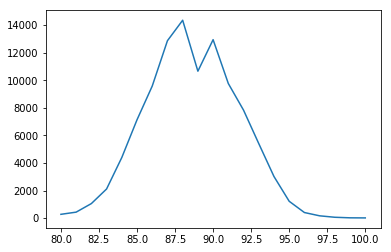

In [39]:
plt.plot(wine_df['points'].value_counts().sort_index())

In [74]:
# normalizing our data to new range
def x_normalized(new_min, new_max, x):
    """
    args: 
        new_min: new min range
        new_max: new max range
        x: numpy array
    """
    x_min = 80
    x_max = 100
    
    return (new_max - new_min) * ((x - x_min) / (x_max - x_min)) + new_min

# range of: [0, 5]
wine_df['norm_points'] = wine_df['points'].apply(lambda x: x_normalized(0, 5, x))
wine_df['norm_points'].value_counts().sort_index()

0.00      275
0.25      433
0.50     1054
0.75     2112
1.00     4395
1.25     7133
1.50     9580
1.75    12871
2.00    14356
2.25    10660
2.50    12946
2.75     9765
3.00     7833
3.25     5408
3.50     3018
3.75     1221
4.00      405
4.25      166
4.50       61
4.75       21
5.00       14
Name: norm_points, dtype: int64

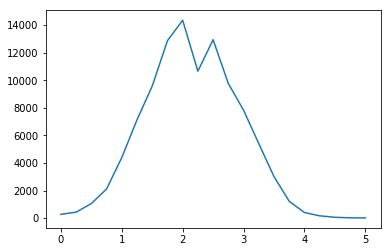

In [75]:
plt.plot(wine_df['norm_points'].value_counts().sort_index())

In [78]:
# we will now drop points
wine_df.drop(columns='points',inplace=True)

In [81]:
# saving as csv
wine_df.to_csv('wine_data/wine_data.csv',index=True)